# Parte B

#### 1. Explique qué es una heurística en problema del laberinto, proponga dos heurísticas y explique cómo pueden ayudar a resolver mejor el problema del laberinto.

Una heurística es una función tal que dado un nodo devuelva el coste estimado del camino más barato desde dado nodo hasta el objetivo. En el caso del problema del laberinto, como toda acción de un nodo a un nodo adyacente a este mismo es de costo (1), la función heurística también se podría ver como la distancia más corta desde el nodo al objetivo.

En el caso del algoritmo de búsqueda informado greedy, por definición debemos utilizar la heurística que define la distancia entre un nodo y el nodo objetivo, eligiendo siempre la celda que parece estar más cercana al final, intuyendo que es probable que esto conduzca a una solución rápidamente. Así tomando $a = (a_x,a_y)$ y $b = (b_x,b_y)$, definimos:

$h(n) = \sqrt{(b_x - a_x)^2 + (b_y - a_y)^2}$.

Para el algoritmo A*, consideremos que para todo nodo $n$ se tienen las coordenadas $(y,x)$, y en particular consideremos las coordenadas del nodo objetivo como $(a,b)$, siendo $y,x,a,b\in\mathbb N$, asi:

$h(n) = (a-y)+(b-x)$.
        
Esta heuristica es posible gracias a que en nuestro caso el nodo objetivo siempre se encontrara en la esquina inferior izquierda del laberinto, así para cualquier nodo esta función representará el número minimo de movimientos que se tendrian que hacer en un entorno sin muros para llegar desde ese nodo al nodo objetivo. Esta función ayuda a la resolución más rápida del laberinto puesto que al momento de expandir un nodo podemos elegir el más cercano a la solución, evitando así tener que expandir nodos en las lejanías de este que en otro caso solo abarrotarían la memoria.

#### 2. Explique brevemente el algoritmo de búsqueda greedy. En particular, su estrategia de exploración y la representación de la frontera.

En primer lugar, el algoritmo de búsqueda greedy es un aalgoritmo de búsqueda informada, es decir, que utiliza pistas específicas del dominio sobre la ubicación de los objetivos. Estas pistas vienen dadas en la forma de funciones heurísticas $h(n)$:

$h(n) = $ costo estimado de el camino más barato desde el estado en el nodo $n$ al estado objetivo. El algoritmo de búsqueda greedy es una forma de mejor primera búsqueda (best-first search) que se expande primero hacia el valor de $h(n)$ más bajo, el nodo que parece estar más cerca al objetivo, sobre la base de que es probable que esto conduzca a una solución rápidamente. Entonces la función a evaluar es $f(n)=h(n)$. 

La búsqueda greedy en grafos es completa en espacios de estados finitos, pero no en infinitos. El peor caso de complejidad de tiempo y de espacio es $O(|V|)$.

En nuestra implementación del algoritmo greedy usamos la heurística $h_{SLD}$, de la distancia de línea recta (straight line distance) con una función que recibe como argumentos las coordenadas de las dos celdas (la celda $b$ siempre es la celda final del laberinto) y esta funcion retorna el valor de la distancia de línea recta entre ellas.


In [1]:
import math

def straight_line_d (a,b):
    d = math.sqrt((b[0]-a[0])**2+(b[1]-a[1])**2)
    return d

Ya hablando de la implementación del algoritmo como tal, vamos revisando cada posición del camino y continuamos haciendo esto mientras esta posición sea diferente a la objetivo. En cada iteración del bucle se agrega la posición en la lista que contiene todas las celdas visitadas; luego, se calcula la lista de adyacencia de la celda y se busca cual de estas celdas adyacentes arroja el menor valor de $h(n)$, al final si se encuentra que la celda con el menor costo es diferente a la posición actual (esto es porque al inicio del bucle se inicializa la variable **closest** con el valor de la posición actual) la posición actual es añadida a la lista que contiene la solución y a la variable **pos** se le asigna el valor de la celda más cercana al objetivo; de lo contrario, se asume que se ha llegado posiblemente a un punto muerto, por lo tanto, si está posición se encuentra en la lista de la solución, se elimina de esta y el valor de la celda a revisar es cambiado a la última celda añadida a la lista de la solución.

In [2]:
from algorithms import csv_to_list, adjacent_list

def greedy_search(start,end,file):
    maze = csv_to_list(file)                                # csv_to_list(file), pasa el archivo csv a una lista
    pos = start
    path = []
    solution = []
    while pos != end:
        path.append(pos)
        list = adjacent_list(pos,maze)                      # calcula la lista de adjacencia de la celda actual
        closest = pos
        for x in list:
            if straight_line_d(pos,end) <= straight_line_d(closest,end) and x not in path:
                closest = x
        if closest == pos:
            if pos in solution:
                solution.remove(pos)
            pos = solution[len(solution)-1]
        else:
            solution.append(pos)
            pos = closest
    path.append(end)
    solution.append(end)
    return path,solution

pygame 2.1.2 (SDL 2.0.18, Python 3.10.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


Nótese que como se iban eliminando las celdas pertenecientes a caminos que no tuvieron éxito en alcanzar la celda objetivo únicamente de la lista de la solución, y eran añadidas tanto en la solución como en la lista de todas las celdas visitadas, al final cuando retornamos ambas listas, podemos afirmar que contienen correctamente todas las celdas visitadas y la sola solución.

#### 3. Explique brevemente el algoritmo A*. En particular, la estrategia de búsqueda y la representación de la frontera.

El algoritmo A* es un algoritmo de búsqueda informada basado en el best-first search, pero con la siguiente función:

$f(n) = g(n)+h(n)$

Donde $g(n)$ será el costo acumulado hasta el nodo y $h(n)$ será una función heurística. Así a diferencia del greedy que solo evalúa la función heurística y tomará el más cercano al objetivo. El A* tomará primero el que no solo está cerca al objetivo sino que también tenga un coste acumulado pequeño, evitando evaluar nodos con costes en extremo altos.

Podremos considerar $f(n)$ como el costo estimado del mejor camino que continua de $n$ hasta el objetivo. 

#### 4. Un algoritmo de búsqueda se dice admisible si tiene garantía de retornar una solución óptima. Si la función heurística utilizada por A* es admisible, entonces A* es admisible. Explique que es una heurística admisible, y pruebe la afirmación previa.

Una heurística admisible es optimista, es decir, nunca sobreestimará el costo del posible camino hasta el objetivo. Esto puesto que si lo hiciera sería posible expandir un nodo que no llevara al camino optimo. Probemos que A* con una heurística admisible siempre devuelve el camino óptimo.
Demostremos esto por contradicción, así supongamos que la función A* nos devolvió un camino con coste $c$, pero existe otro camino con costo $c^\prime$, tal que $c^\prime< c$. Por esto se puede suponer que hay un nodo $n$ que lleva al camino más optimo, pero que no fue expandido por el algoritmo. Tomaremos $g\prime(n)$ como el costo del camino optimo hasta $n$ y $h^\prime(n)$ como el costo del camino optimo de $n$ hasta el objetivo, así $c^\prime=g^\prime(n)+h^\prime(n)$ y analicemos las siguientes desigualdades:

$$
\begin{align}
\begin{split}
f(n) &> c^\prime \\
f(n) &= g(n)+h(n) \\
f(n) &= g^\prime(n)+h(n) \\
f(n)&\leq g^\prime(n)+h^\prime(n)   \\
f(n)&\leq c^\prime 
\end{split} && \begin{split}
&\text{Puesto que si fuera de otra manera el nodo $n$ si hubiera sido expandido} \\
&\text{Así está definida $f(n)$} \\
&\text{Como $n$ está un camino óptimo, su costo acumulado será el costo óptimo} \\
&\text{$h(n)\leq h^\prime(n)$ puesto que $h(n)$ es admisible y no sobreestima} \\
&\text{Por definición de $c^\prime$}
\end{split}
\end{align}
$$
    
Así la primera y ultima linea se contradicen, por lo que hemos demostrado que para una heuristica admisible h(n), A* siempre encontrará el camino más optimo.


#### 5. Un algoritmo $A$ es óptimamente eficiente con respecto a un conjunto de algoritmos alternativos **Alts** en un conjunto de problemas **P** si para cada problema P en **P** y cada algoritmo $A^\prime$ en **Alts**, el conjunto de nodos expandidos por $A$ al resolver P es un subconjunto (posiblemente iguales) del conjunto de nodos expandidos por $A^\prime$ al resolver P. El estudio definitivo de la optimalidad eficiente de A* se debe a Rina Dechter y Judea Pearl [2]. Quienes consideraron una variedad de definiciones de **Alts** y **P** en combinación con la heurística de A* siendo meramente admisible o consistente y admisible. El resultado positivo más interesante que demostraron es que A*, con una *heurística consistente*, es óptimamente eficiente con respecto a todos los algoritmos de búsqueda similares a A* admisibles en todos los problemas de búsqueda "no patólogicos". Este resultado no se cumple si la heurística  de A* es admisible pero no consistente. Explique en que consiste una heurística consistente, muestre un ejemplo de una heurística admisible pero no consistente, y pruebe el resultado de Dechter y Pearl [2]. 

**Definición** (Heurística admisible) Un estimado $h$ es una heurística admisible si es una cota inferior para los costos de la solución óptima; esto es, $h(u)\leq \delta(u,T)$ para todo $u\in V$.

**Definición** (*Heurística consistente*)
Sea $G=(V,E,s,T,w)$ un grafo de problema de estado ponderado. Un objetivo estimado $h$ es una heurística consistente si $h(u)\leq h(v) + w(u,v)$ para todos las aristas $e=(u,v)\in E$.

**Teorema** (*Consistencia y admisibilidad*) Las estimaciones consistentes son admisibles.

*Demostración.* Si $h$ es consistente tenemos que $h(u)-h(v)\leq w(u,v)$ para todo $(u,v)\in E$. Sea $p = (v_0,\ldots, v_k)$ un camino desde $u=v_0$ hasta $t=v_k$. Luego tenemos que

$$ 
w(p) = \sum_{i=0}^{k-1} w(v_i,v_{i+1}) \geq \sum_{i=0}^{k-1} \left( h(v_i) - h(v_{i+1}) \right) = h(u) - h(t) = h(u).
$$

Esto es también verdadero en el importante caso de que $p$ sea un camino óptimo desde $u$ hasta $t\in T$. Por lo tanto, $h(u)\leq \delta(u,T)$. $\qquad \Box$

Ahora, miremos el siguiente grafo

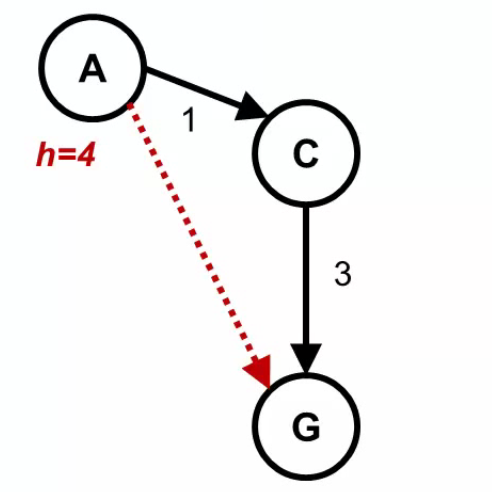

In [3]:
from IPython.display import Image
Image('example.png')

Si queremos que nuestra heurística sea admisible luego deberíamos tener que $h(n)\leq h^*(n)$ para todo nodo $n$ donde $h^*(n)$ es el costo real al objetivo. En nuestro caso, queremos que:

$$
\begin{split}
h(A) &\leq 4 \\
h(C) &\leq 3 \\
h(G) &\leq 0 
\end{split}
$$

Pero, si queremos que neustra heurística sea consistente entonces deberíamos tener que $h(G)=0$ y $h(n)\leq\text{ cost }(n,c)+h(c)$ donde el nodo $c$ es un nodo hijo $c$. Entonces en nuestro caso:

$$
\begin{split}
h(A) &\leq 1 + h(C) \\
h(C) &\leq 3 + h(G) = 3
\end{split}
$$

Si queremos inconsistencia y como $h(C)\leq 3$ para la condición de admisibilidad entonces debemos tener que $h(A)>1+h(C)$. Entonces cualquier heurística que satisfaga:

$$
\begin{split}
h(A) >& 1 + h(C) \\
h(C) &\leq 3 \\
h(G) &= 0
\end{split}
$$

es claramente admisible y no consistente.

A menudo se dice que A* no solo da una solución óptima, si que expande el número mínimal de nodos (hasta desempate). En otras palabras, A* tiene *eficiencia optimal* para cualquier función heurística dada, o que ningún otro algoritmo puede ser demostrado que expanda menos nodos que A*. El resultado, sin embargo, es solo parcialmente verdadero. Es verdadero para heurísticas consistentes, pero no necesariamente para heurísticas admisibles. A continuación presentamos una demostración para el primer caso, que es el que nos interesa.

**Teorema** (*Cota inferior de eficiencia*) Sea $G$ un grafo de problema con una función ponderada no negativa, con un nodo inicial $s$ y un conjunto de nodos finales $T$, y sea $f^* = \delta(s,T)$ el costo de la solución óptima. Cualquier algoritmo óptimo tiene que visitar todos los nodos $u\in V$ con $\delta(s,u)<f^*$.

*Demostración.* Asumimos lo contrario; esto es, que un algoritmo $A$ halla una solución óptima $p_1$ con $w(p_1)=f^*$ y deja algún $u$ con $\delta(s,u)<f^+$ sin visitar. Mostraremos que puede haber otro camino solución $q$ con $w(q)<f^*$ que no está encontrado. Sea $q_u$ el camino con $w(q_U)$ = $\delta(s,u)$, sea $t$ un nodo especial suplementario en $T$ y $V$, y sea $(u,t)$ una nueva arista con $w(u,t)=0$. Como $u$ no está expandido, por $A$ no sabemos si $(u,t)$ existe. Sea $q=(q_u,t)$. Luego $w(q)=w(q_u)+w(u,t)=w(q_u)=\delta(s,u)<f^*$. $\qquad\Box$